### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/densenet121" --epochs 10 --arch densenet121 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3

Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100% 30.8M/30.8M [00:00<00:00, 163MB/s] 
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0714 acc 0.8219 | val loss 0.0456 acc 0.9040 roc_auc 0.9836 pr_auc 0.9930
Epoch 2: train loss 0.0468 acc 0.9048 | val loss 0.0324 acc 0.9232 roc_auc 0.9922 pr_auc 0.9968
Epoch 3: train loss 0.0296 acc 0.9444 | val loss 0.0479 acc 0.9220 roc_auc 0.9930 pr_auc 0.9974
Epoch 4: train loss 0.0295 acc 0.9471 | val loss 0.0186 acc 0.9661 roc_auc 0.9955 pr_auc 0.9983
Epoch 5: train loss 0.0265 acc 0.9488 | val loss 0.0250 acc 0.9401 roc_auc 0.9947 pr_auc 0.9980
Epoch 6: train loss 0.0228 acc 0.9596 | val loss 0.0225 acc 0.9650 roc_auc 0.9944 pr_auc 0.9977
Epoch 7: train loss 0.0211 acc 0.9646 | val los

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/densenet121/best_densenet121.pt"

/usr/bin/python3: Error while finding module specification for 'src.eval' (ModuleNotFoundError: No module named 'src')


### Vizualize pneumonia_1 with Grad-CAM Bacteria


In [ ]:
from IPython.display import Image

In [ ]:

pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/densenet121/best_densenet121.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_1.png" --arch "densenet121"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_1.png. Pred class id: 1


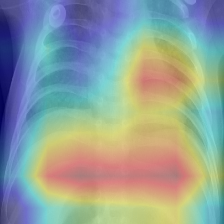

In [ ]:
Image('/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:
pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/densenet121/best_densenet121.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_2.png" --arch "densenet121"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_2.png. Pred class id: 1


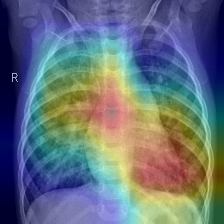

In [ ]:
Image("/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_2.png")

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"

!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/densenet121/best_densenet121.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_noraml_1.png" --arch "densenet121"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_noraml_1.png. Pred class id: 0


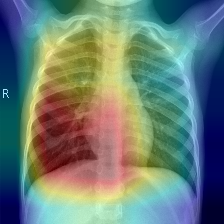

In [ ]:
Image("/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_noraml_1.png")

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/densenet121/best_densenet121.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="densenet121", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 7,545,602


In [ ]:
import torch
print(torch.__version__)

2.8.0+cu126
